Load all required packages 

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

Read the excel sheet data of flowers

In [2]:
df=pd.read_excel("C:\\Users\\91898\\Desktop\\Book2.xlsx")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


LIST ALL THE COLUMN HEADINGS

In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

DIMENSION OF THE DATA 

In [4]:
# dimension
print("the dimension:", df.shape)

the dimension: (150, 5)


DESCRIBE THE BASIC VALUE LIKE COUNT,MIN,MAX...

In [5]:
# Some basic statistical analysis about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


LIST THE COUNT OF ALL THE SPECEIES 

In [6]:
# class distribution
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [7]:
# import ploting tool
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

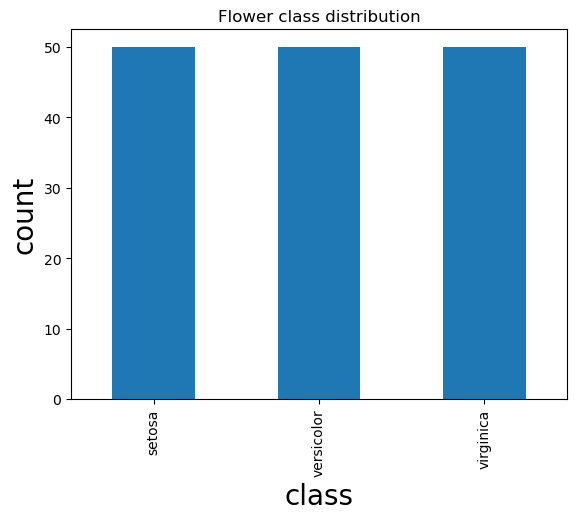

In [8]:
# iris flower dataset class distribution
nameplot = df['species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

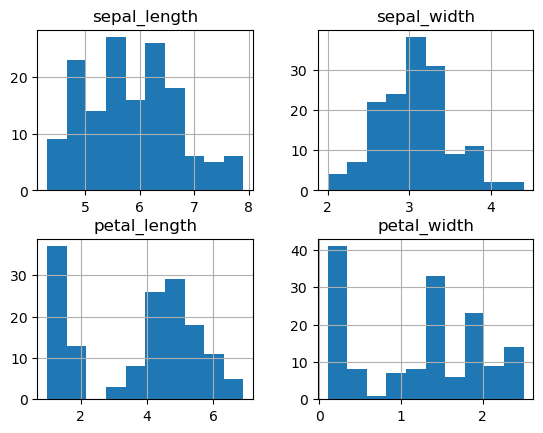

In [9]:
# plot histogram
df.hist()
plt.show()

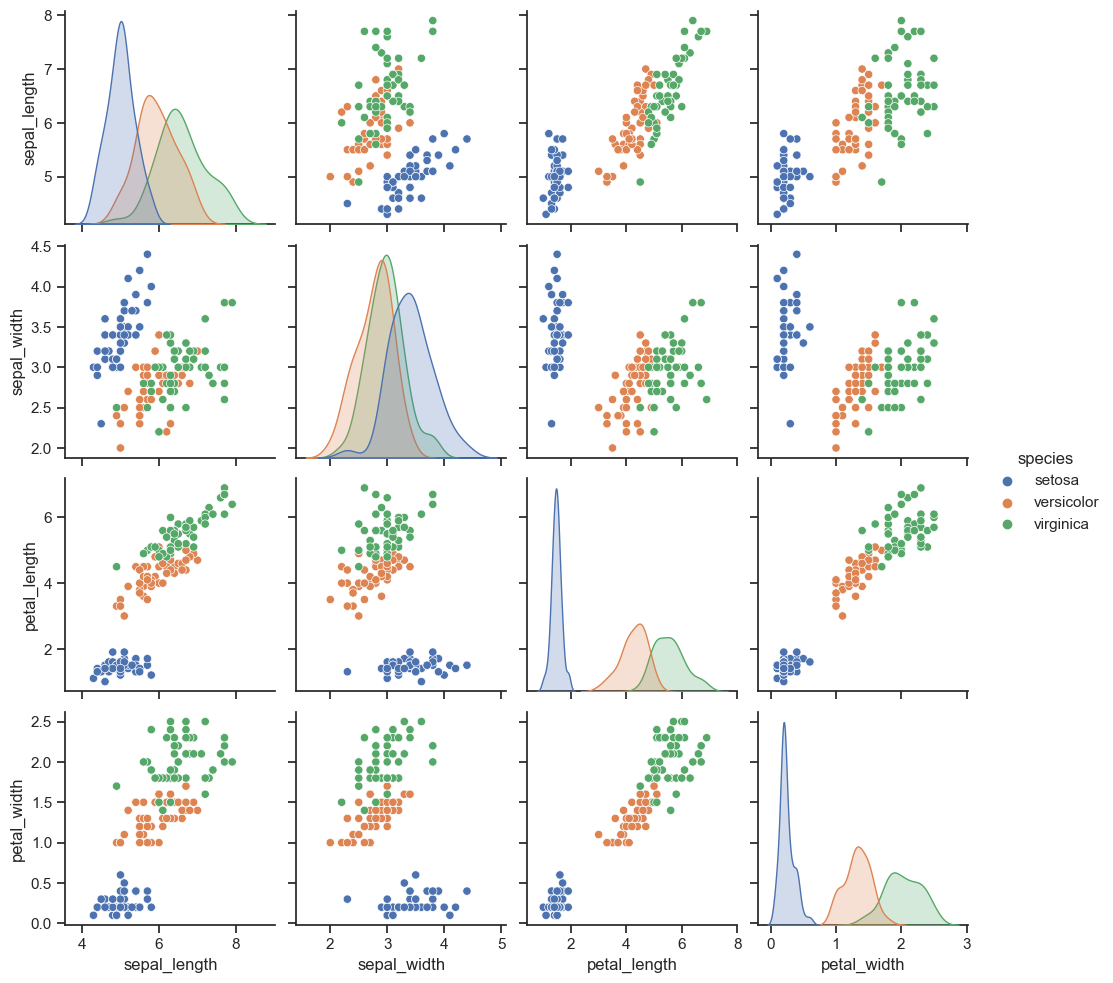

In [10]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, hue="species")

SPLIT THE VALUES 

In [11]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [12]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4,3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(5-1)
width = 0.25

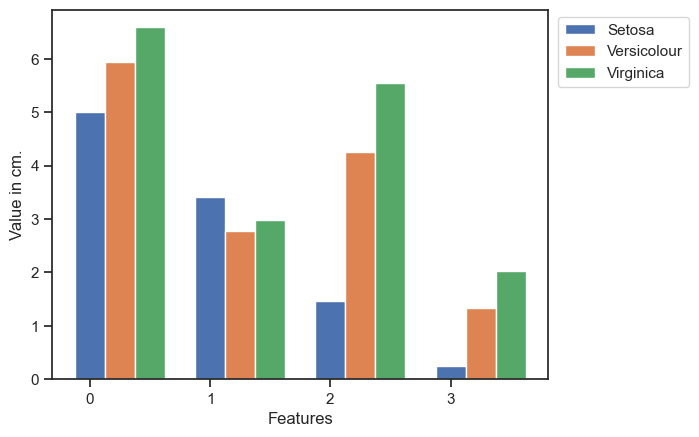

In [13]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis)
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [14]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

PREDICTION 1 USING SVC

In [15]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [16]:
# Predict from the test dataset
prediction1 = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])

virginica virginica
virginica virginica
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
setosa setosa
setosa setosa
virginica versicolor
virginica virginica
setosa setosa
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
setosa setosa
setosa setosa
virginica virginica
setosa setosa
virginica virginica
virginica virginica
versicolor versicolor
versicolor versicolor
setosa setosa
virginica virginica


In [17]:
accuracy_score(y_test, prediction1)*100

96.66666666666667

PREDICTION2 USING LOGISTICS REGRESSION

In [18]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

c:\Users\91898\anaconda3\anacon\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
prediction2 = model_LR.predict(X_test)

from sklearn.metrics import accuracy_score
for i in range(len(prediction2)):
    print(y_test[i],prediction2[i])

virginica virginica
virginica virginica
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
virginica virginica
setosa setosa
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
setosa setosa
setosa setosa
virginica virginica
setosa setosa
virginica virginica
virginica virginica
versicolor versicolor
versicolor versicolor
setosa setosa
virginica virginica


In [20]:
print(accuracy_score(y_test,prediction2)*100)

100.0


PREDICTION3 USING DECISION TREE CLASSIFIER

In [21]:
#deccesion tree
from sklearn.tree import DecisionTreeClassifier

model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
prediction3 = model_DTC.predict(X_test)
from sklearn.metrics import accuracy_score
for i in range(len(prediction3)):
    print(y_test[i],prediction3[i])

virginica virginica
virginica virginica
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
virginica virginica
setosa setosa
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
setosa setosa
setosa setosa
virginica virginica
setosa setosa
virginica virginica
virginica virginica
versicolor versicolor
versicolor versicolor
setosa setosa
virginica virginica


In [23]:
print(accuracy_score(y_test,prediction3)*100)

100.0


PREDICTIONS OF THE SPECIES ON SOME NEW INPUTS 

In [24]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction1 = svn.predict(X_new)
print("Prediction1 of Species: {}".format(prediction1))

Prediction1 of Species: ['setosa' 'versicolor' 'versicolor']


In [25]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction2 = model_LR.predict(X_new)
print("Prediction2 of Species: {}".format(prediction2))

Prediction2 of Species: ['setosa' 'versicolor' 'virginica']


In [26]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction3 = model_DTC.predict(X_new)
print("Prediction3 of Species: {}".format(prediction3))

Prediction3 of Species: ['setosa' 'versicolor' 'virginica']
